In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# 1. Get the data ready

heart_disease = pd.read_csv('heart-disease.csv')

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
### PREPARE DATA

# Create X (features matrix)

X = heart_disease.drop("target",axis=1)

# Create y (labels)
y = heart_disease['target']

In [5]:
import warnings

warnings.filterwarnings('ignore')

In [6]:
# Choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=40)

# W'll keep the default hyper parameters

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# Fit the model to the training data

from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf.fit(X_train,y_train);

In [8]:
# Make a prediction

y_preds = clf.predict(X_test)

In [9]:
y_preds

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [10]:
# Evaluate the model on the training and test data

clf.score(X_train,y_train)


1.0

In [11]:
clf.score(X_test,y_test)

0.819672131147541

In [12]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

print(classification_report(y_test,y_preds));

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        26
           1       0.88      0.80      0.84        35

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [13]:
print(confusion_matrix(y_test,y_preds))

[[22  4]
 [ 7 28]]


In [14]:
accuracy_score(y_test,y_preds)

0.819672131147541

In [15]:
#5. Improve a model

# Try different amount of n_estimators

np.random.seed(42)

for i in range(10,100,10):
    print(f"Trying a model with {i} estimators ")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train,y_train)
    
    print(f"Model accuracy on test set: {clf.score(X_test,y_test) * 100}%")

Trying a model with 10 estimators 
Model accuracy on test set: 83.60655737704919%
Trying a model with 20 estimators 
Model accuracy on test set: 83.60655737704919%
Trying a model with 30 estimators 
Model accuracy on test set: 75.40983606557377%
Trying a model with 40 estimators 
Model accuracy on test set: 85.24590163934425%
Trying a model with 50 estimators 
Model accuracy on test set: 80.32786885245902%
Trying a model with 60 estimators 
Model accuracy on test set: 85.24590163934425%
Trying a model with 70 estimators 
Model accuracy on test set: 85.24590163934425%
Trying a model with 80 estimators 
Model accuracy on test set: 83.60655737704919%
Trying a model with 90 estimators 
Model accuracy on test set: 80.32786885245902%


In [16]:
# 6. Save a model and load it

import pickle

pickle.dump(clf,open("random_forest_model_1.pkl",'wb'))

In [17]:
loaded_model = pickle.load(open("random_forest_model_1.pkl",'rb'))

In [18]:
loaded_model.score(X_test,y_test)

0.8032786885245902

In [19]:
what_we_are_covering = [
    "0. An end to end scikit learn workflow",
    "1. Getting the data ready",
    "2. Chose the right estimator/algorithm for our problems",
    "3. Fit the model.algorithm and use it to make predictions on our data",
    "4. Evaluating the model",
    "5. Improve a model",
    "6.  Save and load a trained model",
    "7. Putting it all together"
]

In [20]:
what_we_are_covering

['0. An end to end scikit learn workflow',
 '1. Getting the data ready',
 '2. Chose the right estimator/algorithm for our problems',
 '3. Fit the model.algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve a model',
 '6.  Save and load a trained model',
 '7. Putting it all together']

In [21]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting our data ready to be used with machine learning

Three main things we have to do

1. Split the data into features and labels (usually `X` & `y`)
2. Filling (also called inputing) or disregarding missing values
3. Converting non numerical values to numerical values (also called feature encoding)

In [22]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [25]:
# Split data into trainig and test sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [27]:
### 1.1 Make sure it's all numerical 

car_sales = pd.read_csv("car-sales-extended-missing-data.csv")

car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [28]:
# Split into X/y

X = car_sales.dropna().drop('Price',axis=1)
y= car_sales.dropna()['Price']


# Split into training and testing


X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)




In [29]:
# Build a machine learning model 

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train,y_train)

model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [30]:
# Turn categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot =  OneHotEncoder()

transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [31]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,163322.0
769,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
770,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
771,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [32]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])

In [33]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4.0,0,1,0,0,0,0,0,0,1
1,5.0,1,0,0,0,0,1,0,0,0
2,4.0,0,1,0,0,0,0,0,0,1
3,4.0,0,0,0,1,0,0,0,0,1
4,3.0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4.0,0,0,0,1,1,0,0,0,0
996,3.0,0,0,0,0,0,0,0,0,1
997,4.0,0,0,1,0,0,1,0,0,0
998,4.0,0,1,0,0,0,0,0,0,1


In [34]:
# Let's refit the model

np.random.seed(42)

X_train , X_test, y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train)

model.score(X_test,y_test)



0.35930666172697523

### 1.2 What if there were some missing values?

1. Fill them with some values (also know as imputation).
2. Remove the samples with missing data altogether


In [35]:
# Import car sales missing data

car_sales_missing= pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [36]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
# Let's try and convert our data to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_fields = ['Make','Colour','Doors']

one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')

transformed_X = transformer.fit_transform(car_sales_missing.drop('Price',axis=1))

ValueError: Input contains NaN

### Option 1 fill missing data with pandas


In [38]:
# Fill the Make column

car_sales_missing['Make'].fillna('missing',inplace=True)

# Fill the color column

car_sales_missing['Colour'].fillna('missing',inplace=True)

# Fill the Odometer (KM)column

car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

# Fill the Doors column 

car_sales_missing['Doors'].fillna(4, inplace=True )

In [39]:
# Check our dataframe again

car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [40]:
# Remove rows with missing price value

car_sales_missing.dropna(inplace=True)

In [41]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [42]:
len(car_sales_missing)

950

In [43]:
X = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

### Option 2: Fill missing values with scikit learn

In [44]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')

car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [45]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
car_sales_missing.dropna(subset=['Price'],inplace=True)

car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [47]:
# Split data into X and y

X = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [48]:
# fill missing values with scikit-learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill  categorical values with 'missing' and numerical values with mean


cat_imputer = SimpleImputer(strategy='constant',fill_value='missing')
door_imputer = SimpleImputer(strategy='constant',fill_value=4)
num_imputer = SimpleImputer(strategy='mean')


# Define columns 


cat_features = ['Make','Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']


# Create an imputer (something that fills missind data)

imputer = ColumnTransformer([
    ('cat_imputer',cat_imputer,cat_features),
    ('door_imputer',door_imputer,door_feature),
    ('num_imputer',num_imputer,num_features),
])

# Transdorm the data


filled_X = imputer.fit_transform(X)

In [49]:
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [50]:
car_sales_filled = pd.DataFrame(filled_X, columns=['Make','Colour','Doors','Odometer (KM)'])

In [51]:
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [52]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [53]:
# Convert data to numerical values

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']

one_hot_encoder = OneHotEncoder()
transformer = ColumnTransformer([
    ('one_hot_encoder',one_hot_encoder,categorical_features)
], remainder='passthrough')

transformed_X = transformer.fit_transform(car_sales_filled)

pd.DataFrame(transformed_X).head()

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."


In [54]:
# Now we've go the data as numbers and filled (no missing values)

# Let's fit the model

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor()

X_train,X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)


model.fit(X_train,y_train)

model.score(X_test,y_test)


0.21990196728583944

In [55]:
what_we_are_covering

['0. An end to end scikit learn workflow',
 '1. Getting the data ready',
 '2. Chose the right estimator/algorithm for our problems',
 '3. Fit the model.algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve a model',
 '6.  Save and load a trained model',
 '7. Putting it all together']

## 2. Choosing the right estimator/algorithm for our problem 

Scikit-Learn uses estimator as another term for machine learning model or algorithm

* Classification-  predicting whether a sample is onething or another
* Regression - Predicting a number


### 2.1 Picking a machine learning model for a regression problem

In [56]:
# Import Boston housing Dataset

from sklearn.datasets import load_boston

boston = load_boston()

boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])

boston_df['target'] = pd.Series(boston['target'])

In [57]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [58]:
len(boston_df)

506

In [59]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
# setup random seed

np.random.seed(3)

# Creaete the data

X = boston_df.drop('target',axis=1)
y = boston_df['target']

# split into train and test sets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate Ridge model

model = Ridge()
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.78830635267977

How do we improve this score?


What if Ridge was not working?



In [60]:
# Let's try the random Forest regressor

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)
rf_model.score(X_test,y_test)

0.9079961076816832

In [61]:
model.score(X_test,y_test), rf_model.score(X_test,y_test)

(0.78830635267977, 0.9079961076816832)

## Choosing the right estimator for a classification problem



In [62]:
heart_disease = pd.read_csv("heart-disease.csv")

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
len(heart_disease)

303

In [64]:
from sklearn.svm import LinearSVC

np.random.seed(42)

# make the data ready

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate LinearSVC

clf = LinearSVC(max_iter=1000)

clf.fit(X_train,y_train)

# Evaluate the LinearSVC

clf.score(X_test,y_test)



0.8688524590163934

In [65]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [66]:


from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# make the data ready

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate LinearSVC

rf_clf = RandomForestClassifier(n_estimators=20)

rf_clf.fit(X_train,y_train)

# Evaluate the LinearSVC

rf_clf.score(X_test,y_test)



0.8688524590163934

In [67]:
what_we_are_covering

['0. An end to end scikit learn workflow',
 '1. Getting the data ready',
 '2. Chose the right estimator/algorithm for our problems',
 '3. Fit the model.algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve a model',
 '6.  Save and load a trained model',
 '7. Putting it all together']

## 3. Fit the model/algorithm on our data and user it to make predictions

### 3.1 Fitting the model to the data

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
model = RandomForestClassifier(n_estimators=20)

heart_disease = pd.read_csv('heart-disease.csv')
X =  heart_disease.drop('target',axis=1)
y = heart_disease['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8688524590163934

## 3.2 Make predictions using a machine learning model

2 ways to make predictions

1. `predict()`
2. `predict_prob()`

In [69]:
# Use a trained model to make predictions

clf = model

clf.predict(X_test)



array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [70]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [71]:
# Compare prediction to truth labels to evaluate the model


y_preds = clf.predict(X_test)
np.mean(y_preds==y_test)

0.8688524590163934

In [72]:
clf.score(X_test,y_test) == np.mean(y_preds == y_test)

True

In [73]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_preds)

0.8688524590163934

Make predictions with `predict_proba()`

In [74]:
# predict_proba() returns probabilities of a classification label

clf.predict_proba(X_test)[:5]


array([[0.8, 0.2],
       [0.5, 0.5],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.1, 0.9]])

In [75]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y= boston_df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor().fit(X_train,y_train)

model.score(X_test,y_test)


0.873969014117403

In [76]:
y_preds = model.predict(X_test)
y_preds[:5]

array([23.002, 30.826, 16.734, 23.467, 16.853])

In [77]:
y_test[:5]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: target, dtype: float64

In [78]:
# Compare the predictions to the truth

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_preds)

2.1226372549019623

In [79]:
what_we_are_covering

['0. An end to end scikit learn workflow',
 '1. Getting the data ready',
 '2. Chose the right estimator/algorithm for our problems',
 '3. Fit the model.algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve a model',
 '6.  Save and load a trained model',
 '7. Putting it all together']

# 4. Evalutating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators

1. Estimator `score` method
2. The `scoring` parameter
2. Problem-specific metric functions


 
## 4.1 Evaluating a model with score method

In [80]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']


X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

clf.score(X_train,y_train)


1.0

In [81]:
clf.score(X_test,y_test)

0.8524590163934426

In [82]:


from sklearn.ensemble import RandomForestRegressor
# Import Boston housing Dataset

from sklearn.datasets import load_boston

boston = load_boston()

boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])

boston_df['target'] = pd.Series(boston['target'])
np.random.seed(42)

X = boston_df.drop('target', axis=1)
y= boston_df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor().fit(X_train,y_train)

model.score(X_test,y_test)


0.873969014117403

In [83]:
model.score(X_test,y_test)

0.873969014117403

### 4.2 Evaluating a model using the `scoring` parameter

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']


X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train);

In [85]:
clf.score(X_test,y_test)

0.8524590163934426

In [86]:
cross_val_score(clf,X,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [87]:
np.random.seed(42)

# Single training and test split score

clf_single_score = clf.score(X_test,y_test)

# Take the mean of 5-fold corss-validation score

clf_cross_val_score = np.mean(cross_val_score(clf,X,y))

In [88]:
clf_single_score

0.8524590163934426

In [89]:
clf_cross_val_score

# Default scoring paramter of classifier = mean accuracy|

0.8248087431693989

In [90]:
# Scoring parameter set to None by default

cross_val_score(clf,X,y,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report


**Accuracy**

In [91]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf.fit(X_train,y_train)

cross_val_score = cross_val_score(clf, X,y)

In [92]:
np.mean(cross_val_score)

0.811639344262295

In [93]:
print(f"Heart Disease classifier Cross-Validated Accuracy:  {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease classifier Cross-Validated Accuracy:  81.16%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve


ROC curves are a comparizon of model's true positive rate (tpr) versus a model's false positive rate (fpr)

* True positive =  model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 1
* True negative  = model predicst 0 when truth is 0
* Fals negative = model predics 0 when truth is 1

In [94]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities

y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [95]:
y_probs_positive = y_probs[ :,1]

y_probs_positive [:10], len(y_probs)


(array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53]), 61)

In [96]:
# Calculate fpr , tpr, and thersholds

fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

# Check the  positive rate

len(fpr), len(tpr), len(thresholds)

(25, 25, 25)

In [97]:
thresholds,len(thresholds)

(array([2.  , 1.  , 0.99, 0.83, 0.82, 0.8 , 0.78, 0.74, 0.67, 0.66, 0.64,
        0.62, 0.61, 0.53, 0.51, 0.3 , 0.2 , 0.16, 0.14, 0.13, 0.11, 0.07,
        0.06, 0.05, 0.  ]),
 25)

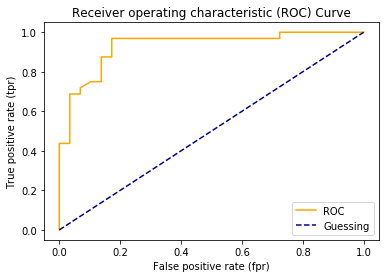

In [98]:
# Create a function for plotting ROC curvers

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false postive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    
    # Plot roc curve
    
    plt.plot(fpr,tpr,color="orange", label="ROC")
    
    #Plot line with no predictive power (baseline)
    
    plt.plot([0,1],[0,1], color="darkblue", linestyle='--', label="Guessing")
    
    # customize the plot
    
    
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
    
    

    
plot_roc_curve(fpr,tpr)
    
    
    

In [99]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.9304956896551724

In [100]:
#Plot perfect roc curve and AUC score

fpr,tpr,thersholds = roc_curve(y_test,y_test)

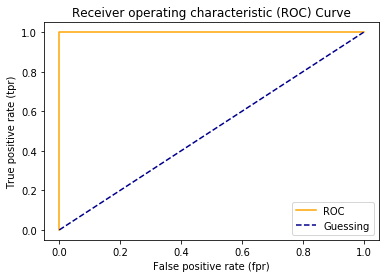

In [101]:
plot_roc_curve(fpr,tpr)

In [102]:
# Perfect auc score 

roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

A confusion matrix is  a quick way to compare the labels a model predicst and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused


In [103]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]])

In [104]:
pd.crosstab(y_preds,y_test)

target,0,1
row_0,,
0,24,4
1,5,28


In [105]:
# Visualize condusion matrix with pd.crosstab

pd.crosstab(y_test,y_preds,rownames=['Actual labels'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual labels,,
0,24,5
1,4,28


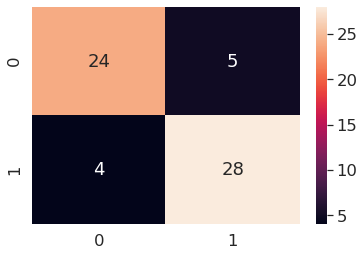

In [106]:
# Make our confusion matrix more visual with a Seaborn's heatmap()

import seaborn as sns

# set the font scale

sns.set(font_scale=1.5)

# Create a confusion matrix

conf_mat =  confusion_matrix(y_test,y_preds)

sns.heatmap(conf_mat,annot=True);

In [107]:
conf_mat

array([[24,  5],
       [ 4, 28]])

In [108]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done

# All requested packages already installed.



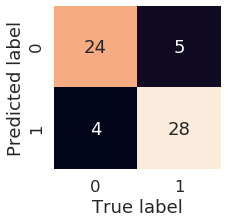

In [109]:
def plot_conf_mat(conf_mat):
    """
    Plot a confusion matrix using Seabor's heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    
    ax = sns.heatmap(conf_mat,
                        annot=True, # Annotate the boxes with conf_mat info
                        cbar=False)
    
     # bottom, top = ax.get_ylim()
    
     # ax.set_ylim(bottom+0.5, top-0.5)
    
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
    
    
    
plot_conf_mat(conf_mat)

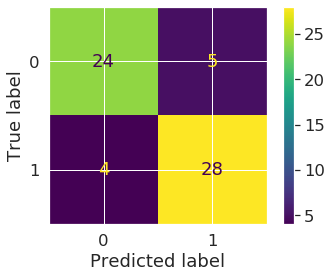

In [110]:
from sklearn.metrics import plot_confusion_matrix

plot = plot_confusion_matrix(clf,X_test,y_test);


**Classification report**

In [111]:
dir(plot)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ax_',
 'confusion_matrix',
 'display_labels',
 'figure_',
 'im_',
 'plot',
 'text_']

In [112]:
plot.figure_.savefig('AAConfusion.png')

In [113]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [114]:
# Where precision and recall become valuable

disease_true = np.zeros(10000)

disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,disease_preds, output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

* **Precision** and **recall** become more important when classes are imbalanced
* If false positive predictions are worse than flase negatives, aim for higher precision
* If false negative predictions are worse than false positives, aim for higher recall
* **F1-score** is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced as r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets , it's R^2 value would be 0. And if your model perfectly predicst a range of numbers it's R^2 value would be 1.

In [115]:
from sklearn.ensemble import RandomForestRegressor


np.random.seed(43)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train);

In [116]:
model.score(X_test,y_test)

0.8791431157627385

In [117]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean

y_test_mean = np.full(len(y_test), y_test.mean())

In [118]:
y_test_mean.mean()

21.948039215686258

In [119]:
r2_score(y_test,y_test_mean)

0.0

In [120]:
r2_score(y_test,y_test)

1.0

**Mean absolute Error (MAE)**

MAE is the average of the absolute differences between predictions and actual values. it gives an idea of how wrong the model predictions are.

In [121]:
# Mean absolute error

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test,y_preds)
mae

2.3784411764705884

In [122]:
df = pd.DataFrame(data={
    "actual values": y_test,
    "predicted values": y_preds
})

df['differences'] = df["predicted values"] - df["actual values"] 

In [123]:
df

,actual values,predicted values,differences
360,25.0,23.140,-1.860
391,23.2,15.224,-7.976
247,20.5,20.679,0.179
57,31.6,30.296,-1.304
244,17.6,18.548,0.948
...,...,...,...
482,25.0,33.105,8.105
64,33.0,31.950,-1.050
98,43.8,44.153,0.353
127,16.2,16.314,0.114


**Mean squared error (MSE)**

In [124]:
# Mean squared error 

from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)

mse

11.145676147058817

In [125]:
# Calculate MSE by hand

squared= np.square(df['differences'])

In [126]:
squared.mean()

11.145676147058817

In [127]:
r2_score(y_test,y_preds)

0.8791431157627386

## 4.23 Finally using the `scoring` parameter

In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop('target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier()

np.random.seed(42)

cv_acc = cross_val_score(clf,X,y,cv=5)


In [129]:
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [130]:
# Cross-validated accuracy

print(f"The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is: 82.48%


In [131]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5, scoring="accuracy")
print(f"The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is: 82.48%


In [132]:
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y,cv=5, scoring="precision")
print(f"The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is: 82.48%


In [133]:
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y,cv=5, scoring="recall")
print(f"The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is: 82.48%


In [134]:
np.random.seed(42)
cv_f1 = cross_val_score(clf,X,y,cv=5, scoring="f1")
print(f"The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is: 82.48%


In [135]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

model = RandomForestRegressor()

In [136]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X,y,cv=5, scoring=None)
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [137]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X,y,cv=5, scoring="r2")
cv_r2.mean()

0.622375083951403

In [138]:
np.random.seed(42)

cv_mae = cross_val_score(model, X,y,cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.12870588, -2.58823762, -3.3420198 , -3.75555446, -3.34263366])

In [139]:
np.random.seed(42)

cv_mse = cross_val_score(model, X,y,cv=5, scoring="neg_mean_squared_error")
cv_mse

array([ -7.99104182, -12.88009356, -20.06894699, -45.70549288,
       -19.77049657])

### 4.3 Using different evaluation metrics as Scikit-Learn functions

**Classification evaluation functions**

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train);

# Make some predictions

y_preds = clf.predict(X_test)

# Evaluate classifier

print('Classifier metrics on the test set')

print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test,y_preds)*100:.2f}%")
print(f"F1: {f1_score(y_test,y_preds)*100:.2f}%")




Classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


**Regression evaluation functions**

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

np.random.seed(42)
X = boston_df.drop('target',axis=1)
y = boston_df['target']

X_train,X_test , y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)

# Evaluate regressor

y_preds = model.predict(X_test)

print('Regressor metrics on the test set.')

print(f"R^2: {r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")

Regressor metrics on the test set.
R^2: 0.8739690141174031
MAE: 2.1226372549019623
MSE: 9.242328990196082


## 5. Improving a model


First predictions = baseline predictions.
First model = baseline model.

**From data perspective**


* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

**From a model perspective:**
* Is there a better model we could use?
* Could we improve the current model? (improve hyper parameters??)

**Hyperparameters VS Parameters**

* Parameters = model finds these patterns in data

* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns


Three ways to adjust hyperparameters

1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [142]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [143]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test.

In [144]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:
* `max_deph`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`


In [149]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_preds labels.
    """
    
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    
    metric_dict = {"accuracy": round(accuracy,2),
                  "precision": round(precision,2),
                  "recall":round(recall,2),
                  "f1": round(f1,2)}
    
    print(f"Acc: {accuracy*100:.2f}%")    
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall: {recall*100:.2f}")
    print(f"F1 score: {f1*100:.2f}")
    
    return metric_dict



In [169]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X and y

X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split the data into train, validation nad test sets

train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data

valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # +15% of data

X_train, y_train = X[:train_split], y[:train_split]
X_valid,y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test,y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Make predictions 

y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set

baseline_metrics = evaluate_preds(y_valid,y_preds)


Acc: 82.22%
Precision: 81.48%
Recall: 88.00
F1 score: 84.62


In [168]:
np.random.seed(42)

# Create a second classifier with different hyperparameters

clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train);

# Make predictions  with different hyperparameters


y_preds_2 = clf_2.predict(X_valid)

# Evaluate second calssifier

clf_2_metrics = evaluate_preds(y_valid,y_preds_2)

Acc: 82.22%
Precision: 84.00%
Recall: 84.00
F1 score: 84.00


In [156]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [218]:
np.random.seed(42)
clf_3 = RandomForestClassifier(n_estimators=100, max_depth=100)

clf_3.fit(X_train,y_train)

y_preds_3 = clf_3.predict(X_valid)

clf_3_metrics =evaluate_preds(y_valid,y_preds_3)

Acc: 91.11%
Precision: 92.00%
Recall: 92.00
F1 score: 92.00


### 5.2 Hyperparameters tuning with RandomizedSearch



In [202]:
from sklearn.model_selection import RandomizedSearchCV

grid =  {
    "n_estimators":[10,100,200,500,1000,1200],
    "max_depth":[None,5,10,20,30],
    "max_features":["auto", "sqrt"],
    "min_samples_split":[2,4,6],
    "min_samples_leaf":[1,2,4]
}

np.random.seed()

# Split into X and y

X =  heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

# Split inot train and test sets

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_jobs=-1)

# Setup RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, # Number of models to try,
                           cv=5, verbose=2)



# Fit the RandomizedSearchCV version of clf


rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, total=   1.3s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, total=   0.0s
[CV] n_estimators=200, min_samples_split=4,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.5s
[CV] n_estimators=100, min_samples_split=6, min_samp

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.3s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   18.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [204]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

In [207]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 73.68%
Recall: 96.55
F1 score: 83.58


### 5.3 Hyperparameter tuning with GridSearchCV

In [208]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [212]:
grid_2 =  {
    "n_estimators":[10,100,200],
    "max_depth":[10,30],
    "max_features":["auto", "sqrt"],
    "min_samples_split":[6],
    "min_samples_leaf":[1,2]
}

In [214]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

X =  heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

# Split inot train and test sets

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_jobs=-1)

# Setup RandomizedSearchCV

gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5, verbose=2)



# Fit the RandomizedSearchCV version of clf


gs_clf.fit(X_train,y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   1.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_lea

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   25.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random_

In [216]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [217]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 77.42%
Recall: 85.71
F1 score: 81.36


Le'ts compare our different models Metrics

In [219]:
compare_metrics = pd.DataFrame({
    "baseline":baseline_metrics,
    "clf_3": clf_2_metrics,
    "random search": rs_metrics,
    "grid search": gs_metrics
})

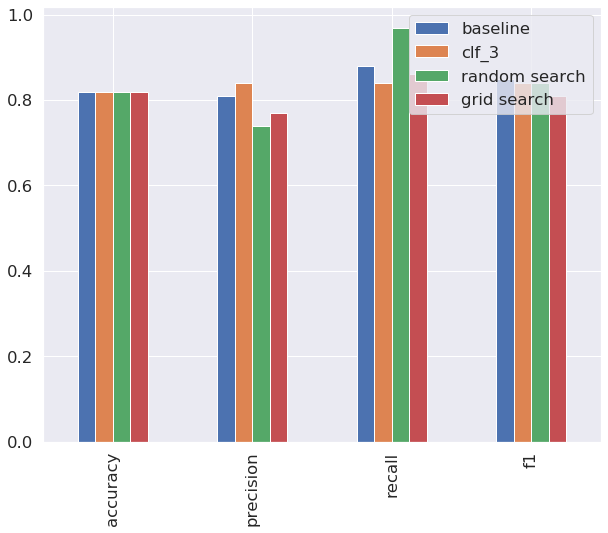

In [221]:
compare_metrics.plot.bar(figsize=(10,8))

In [222]:
compare_metrics

,baseline,clf_3,random search,grid search
accuracy,0.82,0.82,0.82,0.82
precision,0.81,0.84,0.74,0.77
recall,0.88,0.84,0.97,0.86
f1,0.85,0.84,0.84,0.81


In [223]:
what_we_are_covering

['0. An end to end scikit learn workflow',
 '1. Getting the data ready',
 '2. Chose the right estimator/algorithm for our problems',
 '3. Fit the model.algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve a model',
 '6.  Save and load a trained model',
 '7. Putting it all together']

## 6. Saving and loading a trained machine learning models

Two ways to save and load machine learning models:
    
   1. With Python's `Pickle` module
    
   2. With the `joblib` module

In [227]:
import pickle

# Save an existing model to file

pickle.dump(gs_clf, open("models/gs_random_forest_model_1.pkl", "wb"))

# Load saved model

loaded_pickle_model = pickle.load(open('models/gs_random_forest_model_1.pkl','rb'))

In [230]:


# Make predictions

pickle_y_preds = loaded_pickle_model.predict(X_test)

evaluate_preds(y_test,pickle_y_preds)

Acc: 81.97%
Precision: 77.42%
Recall: 85.71
F1 score: 81.36


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**Joblib**

In [231]:
from joblib import dump, load

# Save model to file

dump(gs_clf, filename="models/gs_random_forest_model_2.joblib")

['models/gs_random_forest_model_2.joblib']

In [232]:
# Import a saved joblib model

loaded_joblib_model = load(filename='models/gs_random_forest_model_2.joblib')

In [237]:
joblib_y_preds = loaded_joblib_model.predict(X_test)

In [238]:
evaluate_preds(y_test,joblib_y_preds)

Acc: 81.97%
Precision: 77.42%
Recall: 85.71
F1 score: 81.36


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

In [239]:
what_we_are_covering

['0. An end to end scikit learn workflow',
 '1. Getting the data ready',
 '2. Chose the right estimator/algorithm for our problems',
 '3. Fit the model.algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve a model',
 '6.  Save and load a trained model',
 '7. Putting it all together']

# Putting it all together!

In [243]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [245]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to follow (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data


In [290]:
# Getting data ready

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


# Modeling

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed

import numpy as np

# Import data and drop rows with missing labels
data = pd.read_csv('car-sales-extended-missing-data.csv')

data.dropna(subset=['Price'], inplace=True)

# Define different features and transformer pipelines

categorical_features  = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="constant", fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


door_feature =['Doors']
door_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=4)),
])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Setup preprocessing steps (fill missing values, the convert to numbers)

preprocessor = ColumnTransformer(
transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('door', door_transformer, door_feature),
    ('num', numeric_transformer, num_features)
]
)


# Create a preprocessing and a modeling pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])


# Split data

X = data.drop('Price', axis=1)
y = data['Price']

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.18673337091147657

It's also possible to user `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [288]:
# Use GridSearchCV with our regression model
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    'preprocessor__num__imputer__strategy':["mean", "median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":['auto'],
    "model__min_samples_split":[2,4]
}

gs_model = GridSearchCV(model,pipe_grid,cv=5, verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.7s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.7s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   2.8s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [286]:
gs_model.score(X_test,y_test)

0.33459981646718895

In [287]:
what_we_are_covering

['0. An end to end scikit learn workflow',
 '1. Getting the data ready',
 '2. Chose the right estimator/algorithm for our problems',
 '3. Fit the model.algorithm and use it to make predictions on our data',
 '4. Evaluating the model',
 '5. Improve a model',
 '6.  Save and load a trained model',
 '7. Putting it all together']